<a href="https://colab.research.google.com/github/Shubhamgupta0309/Data-Analysis-on-Ethereum-Dataset/blob/main/DM_Exp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('ETH_day.csv')
print("Data Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1438 non-null   object 
 1   Symbol      1438 non-null   object 
 2   Open        1438 non-null   float64
 3   High        1438 non-null   float64
 4   Low         1438 non-null   float64
 5   Close       1438 non-null   float64
 6   Volume ETH  1438 non-null   float64
 7   Volume USD  1438 non-null   float64
dtypes: float64(6), object(2)
memory usage: 90.0+ KB
None

Summary Statistics:
              Open         High          Low        Close    Volume ETH  \
count  1438.000000  1438.000000  1438.000000  1438.000000  1.438000e+03   
mean    239.397149   248.919200   227.681446   239.468011  3.720638e+04   
std     237.662224   248.677428   222.794938   237.606382  6.908336e+04   
min       6.770000     7.290000     5.990000     6.770000  0.000000e+00   
25%      79.782500 

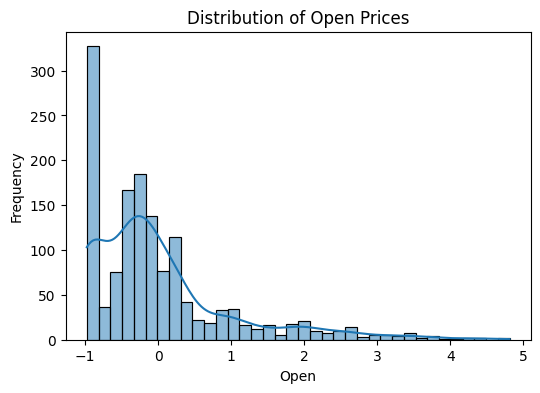

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Histogram for a numerical column
plt.figure(figsize=(6, 4))
sns.histplot(df['Open'], kde=True)
plt.title('Distribution of Open Prices')
plt.xlabel('Open')
plt.ylabel('Frequency')
plt.show()


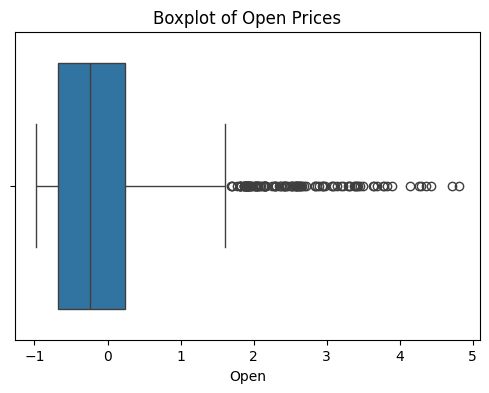

In [ ]:
# Boxplot to visualize outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Open'])
plt.title('Boxplot of Open Prices')
plt.xlabel('Open')
plt.show()

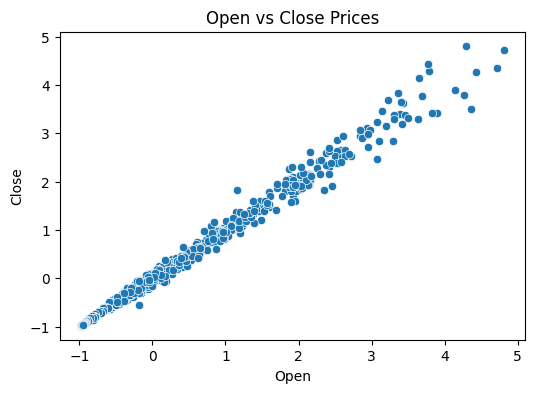

In [ ]:

# Scatter plot to analyze relationship between Open and Close
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Open', y='Close', data=df)
plt.title('Open vs Close Prices')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

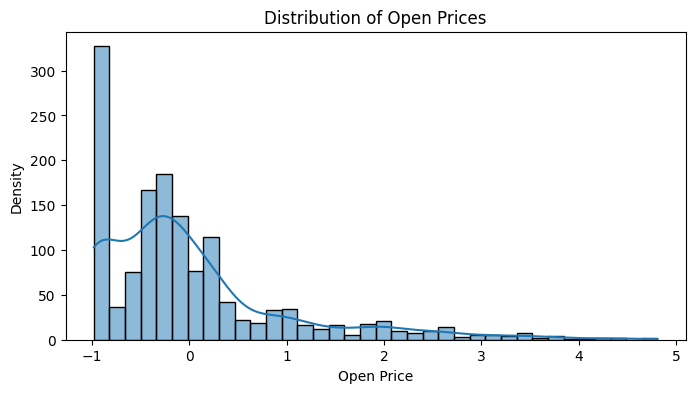

Shapiro-Wilk Test: Statistics=0.8201354963549217, p-value=2.3299299149554745e-37


In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Open'], kde=True)
plt.title('Distribution of Open Prices')
plt.xlabel('Open Price')
plt.ylabel('Density')
plt.show()
from scipy.stats import shapiro
stat, p_value = shapiro(df['Open'].dropna())
print(f"Shapiro-Wilk Test: Statistics={stat}, p-value={p_value}")


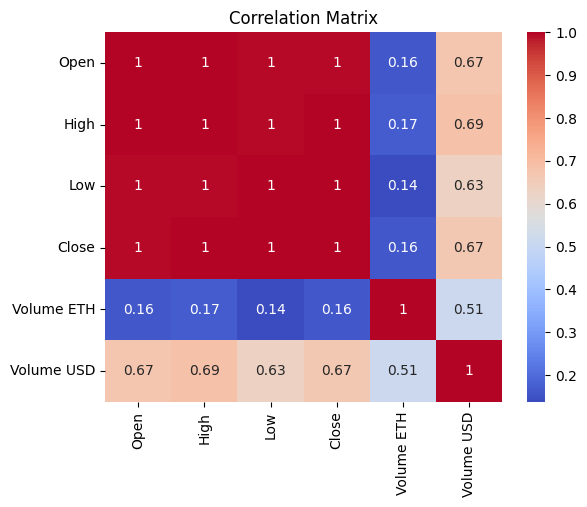

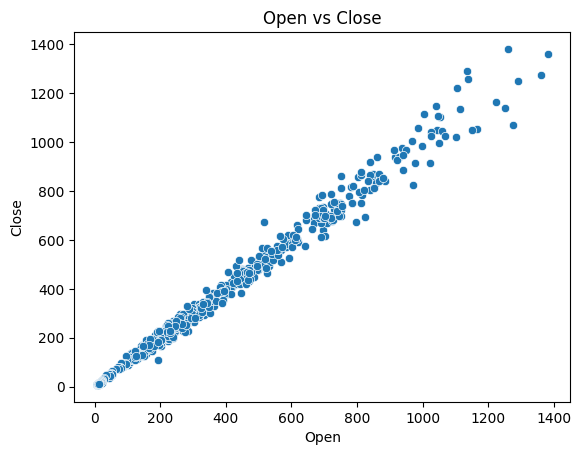

In [ ]:
df_numeric = df.select_dtypes(include=[float, int])
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

sns.scatterplot(x='Open', y='Close', data=df)
plt.title('Open vs Close')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

In [ ]:
import numpy as np
from scipy import stats
z_scores = np.abs(stats.zscore(df_numeric))
outliers = df[(z_scores > 3).all(axis=1)]
print("\nOutliers Detected:")
print(outliers)


Outliers Detected:
Empty DataFrame
Columns: [Date, Symbol, Open, High, Low, Close, Volume ETH, Volume USD]
Index: []



Frequency Table for Date:
Date
2020-04-15    1
2017-09-14    1
2017-08-25    1
2017-08-26    1
2017-08-27    1
             ..
2018-12-25    1
2018-12-26    1
2018-12-27    1
2018-12-28    1
2016-05-09    1
Name: count, Length: 1438, dtype: int64


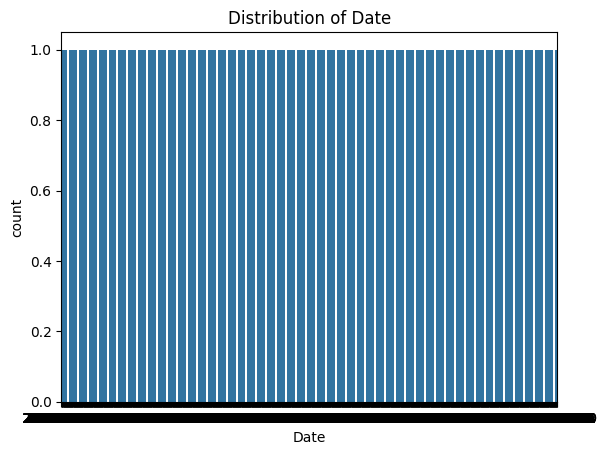

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"\nFrequency Table for {column}:")
    print(df[column].value_counts())
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()

In [ ]:
df['Price_Range'] = df['High'] - df['Low']
df['Price_Change'] = df['Close'] - df['Open']

print(df[['Price_Range', 'Price_Change']].head())


   Price_Range  Price_Change
0     0.000000      0.000000
1     0.040082      0.010328
2     0.060282     -0.010015
3     0.063013     -0.000627
4     0.045580      0.002508


In [ ]:
missing_values = df.isnull().sum()
df['Volume ETH'].fillna(df['Volume ETH'].mean(), inplace=True)
df.dropna(subset=['Close'], inplace=True)
print(df.isnull().sum())


Date                 0
Symbol               0
Open                 0
High                 0
Low                  0
Close                0
Volume ETH           0
Volume USD           0
Log_Open             0
Standardized_Open    0
Price_Range          0
Price_Change         0
dtype: int64


<ipython-input-34-2f4899d1421e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Volume ETH'].fillna(df['Volume ETH'].mean(), inplace=True)


In [ ]:
from scipy.stats import ttest_ind

mid_idx = len(df) // 2
df_first_half = df.iloc[:mid_idx]
df_second_half = df.iloc[mid_idx:]

stat, p_value = ttest_ind(df_first_half['Open'].dropna(), df_second_half['Open'].dropna())

print(f"T-test: Statistics={stat}, p-value={p_value}")

T-test: Statistics=-0.4697372411913693, p-value=0.6386140776454827


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
df = pd.get_dummies(df, columns=['Symbol'], drop_first=True)

encoder = LabelEncoder()
if 'Symbol' in df.columns:
    df['Symbol_encoded'] = encoder.fit_transform(df['Symbol'])

scaler = StandardScaler()
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume ETH', 'Volume USD']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print(df.head())


         Date      Open      High       Low     Close  Volume ETH  Volume USD
0  2020-04-15 -0.340042 -0.363284 -0.310130 -0.340421   -0.538760   -0.531749
1  2020-04-14 -0.346945 -0.349044 -0.323017 -0.340421   -0.277222   -0.397724
2  2020-04-13 -0.340253 -0.359664 -0.348250 -0.347325   -0.311443   -0.418978
3  2020-04-12 -0.339832 -0.336091 -0.325396 -0.340631   -0.352292   -0.434560
4  2020-04-11 -0.341516 -0.351699 -0.329707 -0.340210   -0.339486   -0.430355


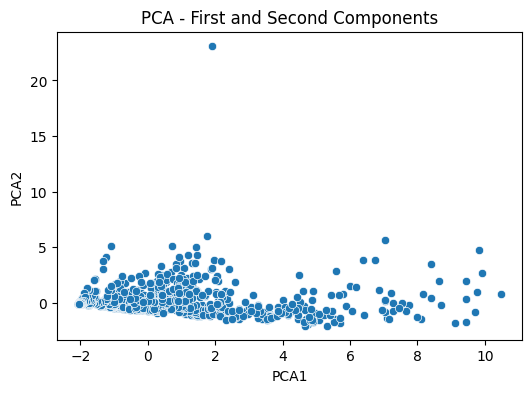

In [ ]:
from sklearn.decomposition import PCA

features = df[['Open', 'High', 'Low', 'Close', 'Volume ETH', 'Volume USD']]
features_standardized = scaler.fit_transform(features)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_standardized)
df['PCA1'], df['PCA2'] = pca_components[:, 0], pca_components[:, 1]
plt.figure(figsize=(6, 4))
sns.scatterplot(x='PCA1', y='PCA2', data=df)
plt.title('PCA - First and Second Components')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()